In [ ]:
'''
Multiple Linear Regression

    y_hat = m1x1 + m2x2 ... mnxn + b
    
ms are the feature coefficients
xs are the values of the features
b is the intercept
y_hat is the predicted value of the outcome variable
'''

In [ ]:
'''
California Housing Data:
Features:
- Income
- House age
- # of rooms
- # of bedrooms
- block population
- occupancy
- latitude
- longitude
- ...

All features for predicting the house price
'''

In [1]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing() #bunch object

In [2]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
california.data.shape

(20640, 8)

In [4]:
california.target.shape

(20640,)

In [5]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
import pandas as pd

df = pd.DataFrame(california.data, columns = california.feature_names)
df['Value'] = california.target

In [7]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Value  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [8]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Value  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [9]:
features = df.drop('Value', axis = 1)

In [10]:
features.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [11]:
target = df['Value']
target[:5]

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Value, dtype: float64

In [12]:
%matplotlib notebook

In [13]:
# Too many data points?
# Code to plot a randomized subset of the data
sample_df = df.sample(frac = 0.1, random_state = 3000)

<IPython.core.display.Javascript object>


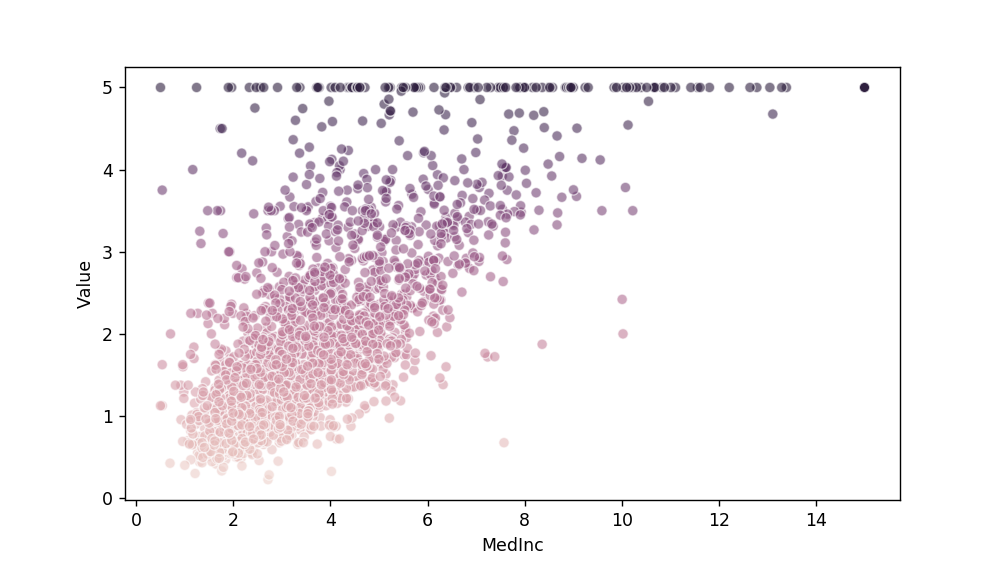

<IPython.core.display.Javascript object>


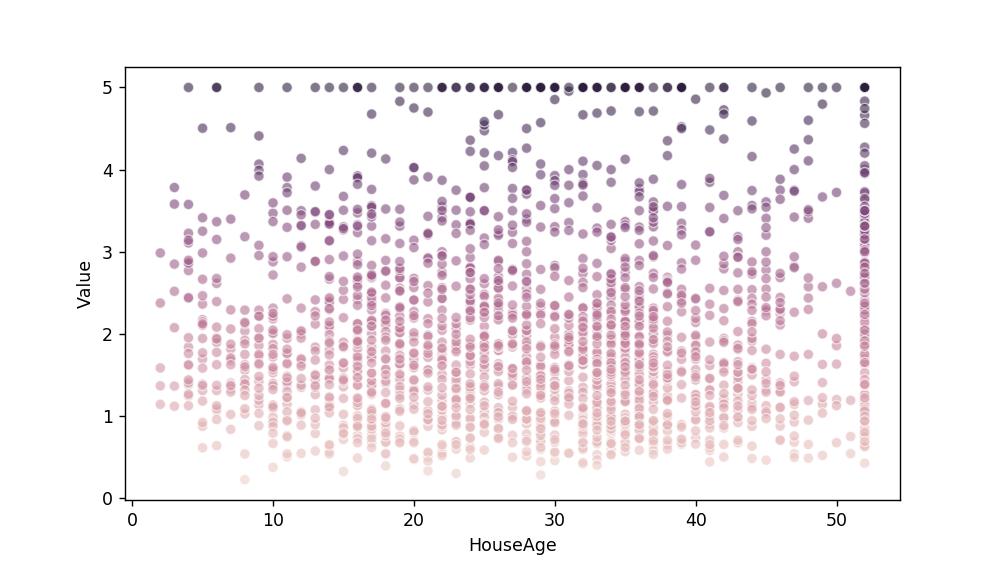

<IPython.core.display.Javascript object>


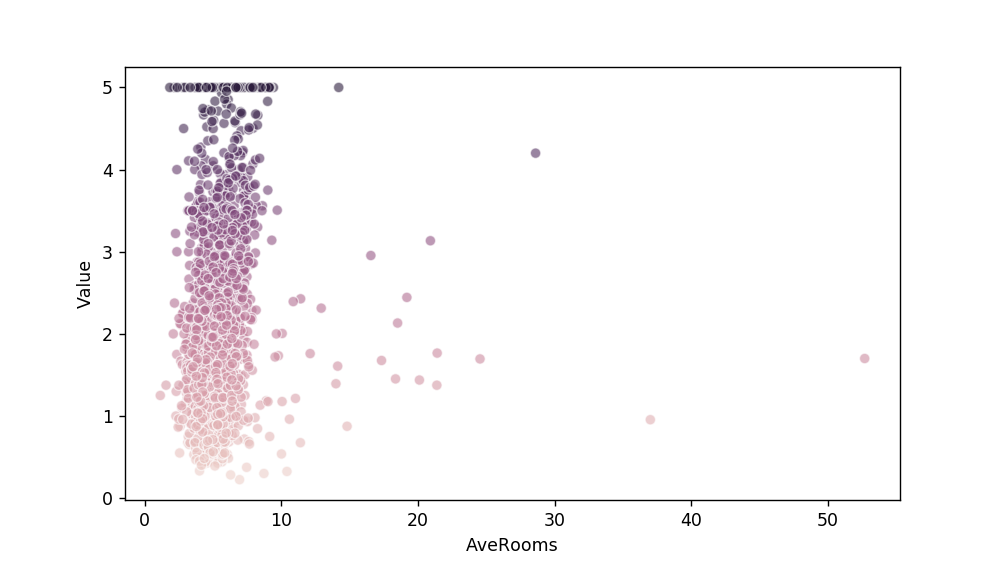

<IPython.core.display.Javascript object>


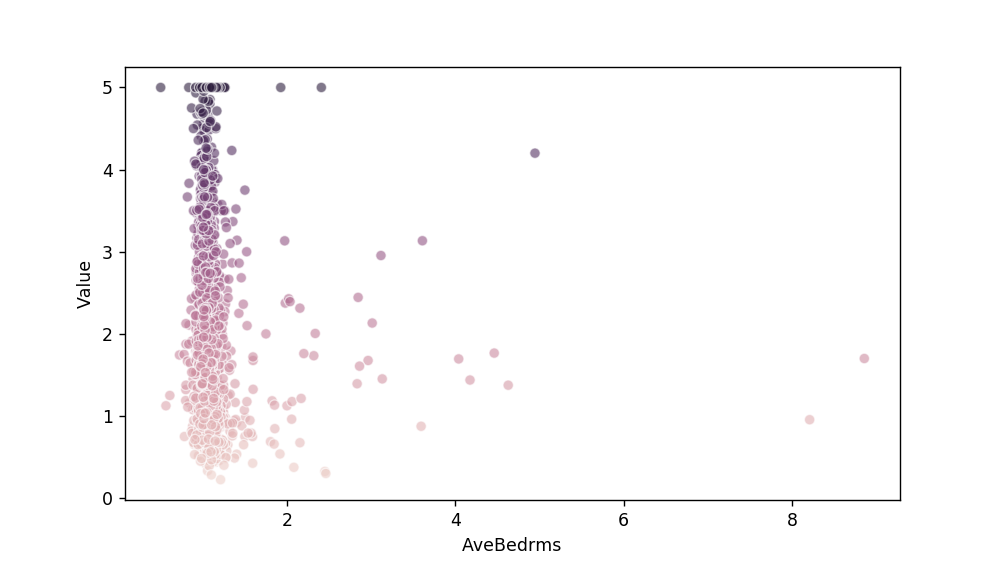

<IPython.core.display.Javascript object>


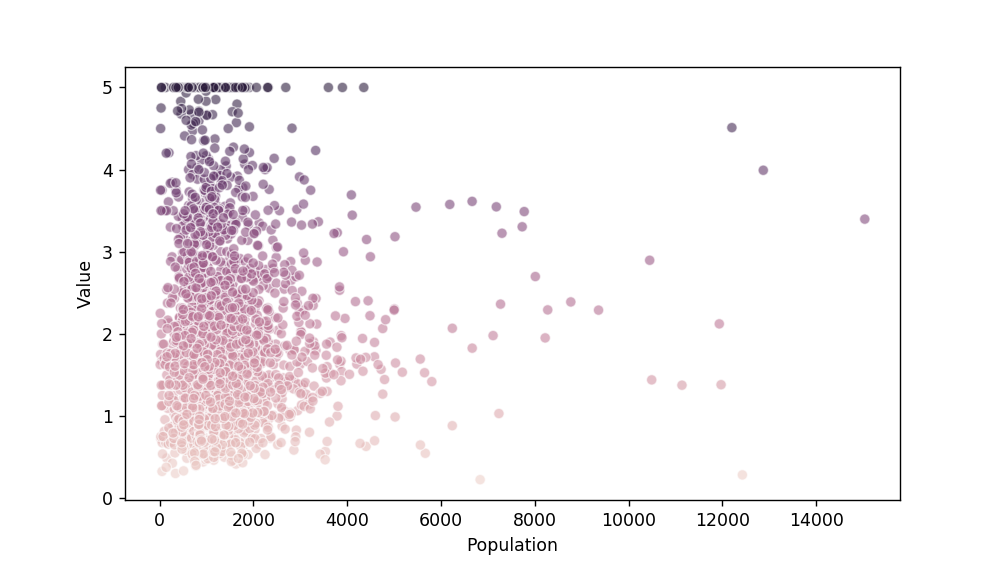

<IPython.core.display.Javascript object>


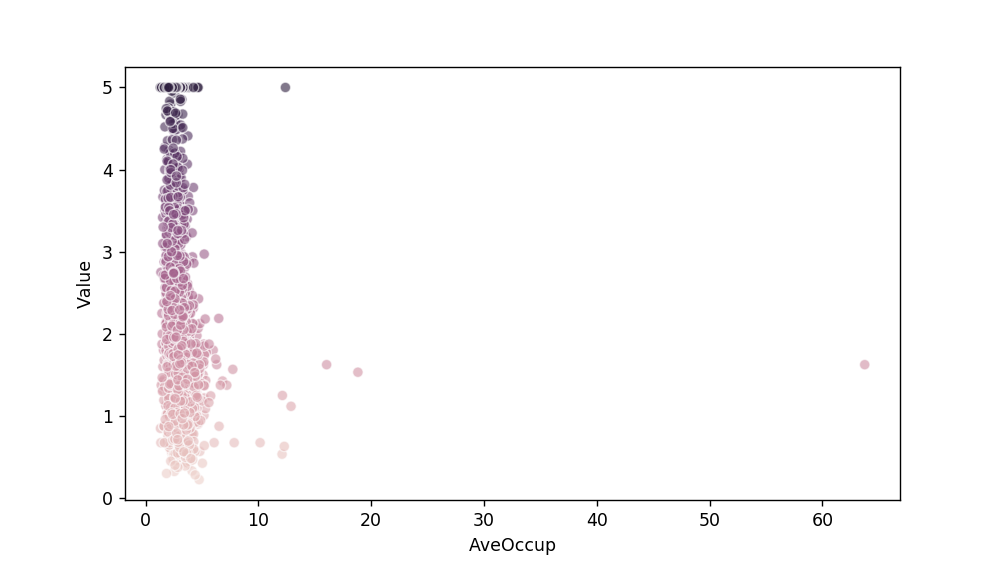

<IPython.core.display.Javascript object>


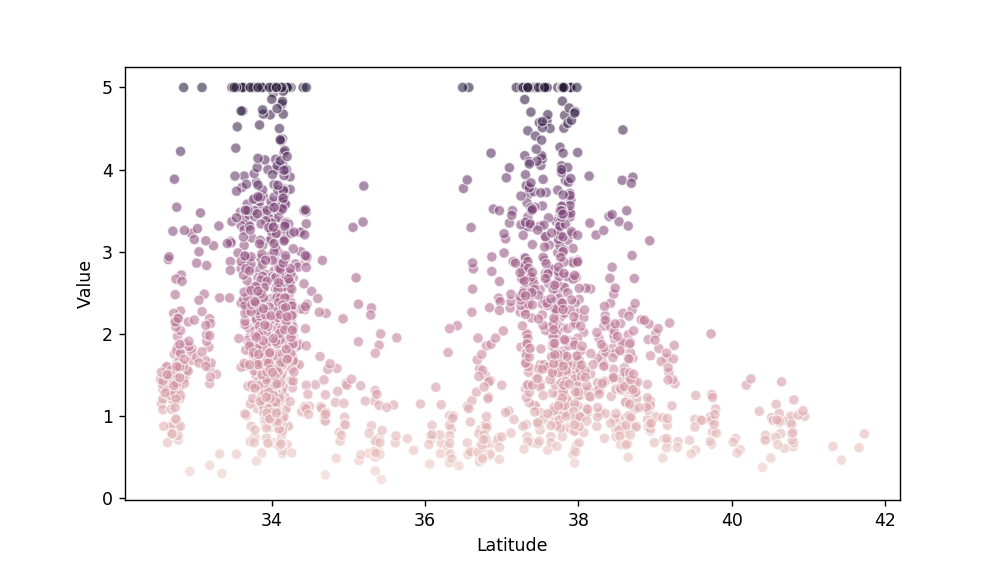

<IPython.core.display.Javascript object>


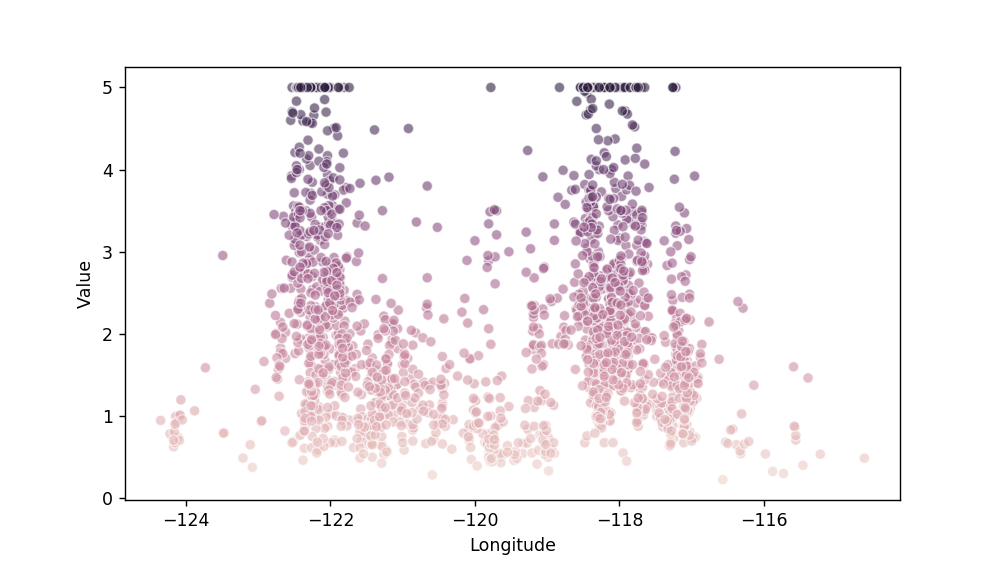

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')

for feature in california.feature_names:
    plt.figure(figsize = (8, 4.5))
    sns.scatterplot(data = sample_df, x = feature, y = 'Value', hue = 'Value',
                    legend = False, alpha = 0.6)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)

# select a regressor and create the model by fitting the training data
model = LinearRegression().fit(X = X_train, y = y_train)



In [16]:
model.coef_

array([ 4.46861640e-01,  9.59333302e-03, -1.22025196e-01,  7.26603003e-01,
       -6.85978050e-06, -3.88023344e-03, -4.19926127e-01, -4.30695289e-01])

In [17]:
intercept = model.intercept_
intercept

-36.587085971531785

In [18]:
'''
Enumerate: adds a counter to an iterable and returns it and 
           the corresponding sequence item in a tuple
'''

for i, name in enumerate(california.feature_names):
    print(f'{name : >10}: {model.coef_[i]}')

    MedInc: 0.44686163964145986
  HouseAge: 0.009593333023448601
  AveRooms: -0.12202519614716767
 AveBedrms: 0.7266030033600074
Population: -6.859780499508423e-06
  AveOccup: -0.0038802334420957813
  Latitude: -0.4199261270450624
 Longitude: -0.4306952892872339


In [19]:
predicted = model.predict(X_test)

In [20]:
expected = y_test

In [21]:
predicted[:5]

array([1.62756194, 2.28587986, 1.43655612, 1.35974381, 1.56089191])

In [22]:
expected[:5]

395      3.500
20452    1.968
5980     1.360
11879    1.016
4341     2.250
Name: Value, dtype: float64

In [23]:
for p, e in zip(predicted[:5], expected[:5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 1.63, expected: 3.50
predicted: 2.29, expected: 1.97
predicted: 1.44, expected: 1.36
predicted: 1.36, expected: 1.02
predicted: 1.56, expected: 2.25


In [24]:
results_df = pd.DataFrame(expected.values, columns = ['expected'])

In [25]:
results_df['predicted'] = predicted

In [26]:
results_df

expected  predicted
0        3.500   1.627562
1        1.968   2.285880
2        1.360   1.436556
3        1.016   1.359744
4        2.250   1.560892
...        ...        ...
5155     1.500   1.975805
5156     0.610   0.757830
5157     1.070   1.363416
5158     1.351   1.802890
5159     0.709   1.040256

[5160 rows x 2 columns]

In [27]:
from sklearn.metrics import r2_score
r2_score(expected, predicted)

# we can explain about 60% of the outcome variable

0.5954462325232102

In [28]:
'''
QUANTIFYING ERROR

R-squared formula

1 -   sum(y - y_hat)^2
      ----------------
      sum(y - y_avg)^2
      
# how much the data deviates from the predicted values and the average values

Mean Squared Error

sum(y - y_hat)^2
-----------------
Number of Samples

# As close to zero as possible
# summing the prediction errors 
# average amount of squared error
'''

'\nQUANTIFYING ERROR\n\nR-squared formula\n\n1 -   sum(y - y_hat)^2\n      ----------------\n      sum(y - y_avg)^2\n      \n# how much the data deviates from the predicted values and teh average values\n\nMean Squared Error\n\nsum(y - y_hat)^2\n-----------------\nNumber of Samples\n\n# As close to zero as possible\n# summing the preduction errors \n# average amount of squared error\n'

In [29]:
import plotly.express as px
import plotly.graph_objects as go

#produce the scatter plot
graph = px.scatter(results_df, x="expected", y="predicted", template="none", color="predicted", opacity=.7)

#add the "perfect prediction" line; this is not the regression line
graph.update_layout(
    
    shapes=[    
        go.layout.Shape(
            type="line",
            x0=0, y0=0,
            x1=5, y1=5,
            line=dict(color="coral", width=2, dash="dash")
        )
    ]
)

#need to change axes limits; otherwise, plotly will auto-scale, leading to confusion
graph.update_layout(xaxis = dict(range = [0,6]))
graph.update_layout(yaxis = dict(range = [0,6]))

graph.show()